# Data Preprocessing

In [71]:
import pandas as pd

df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## Cek Missing Value

In [72]:
print("Jumlah missing value:")
df.isnull().sum()

Jumlah missing value:


Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

Setelah di cek, ternyata tidak ada Missing Value

## Cek Duplicate Value

In [73]:
print("Jumlah duplicate value:")
df.duplicated().sum()

Jumlah duplicate value:


0

Setelah di cek, ternyata tidak ada duplicate value

## Cek Outlier

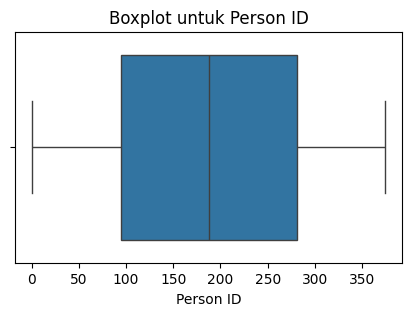

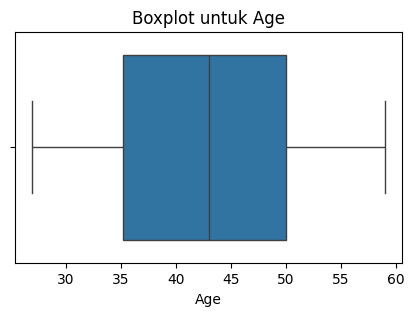

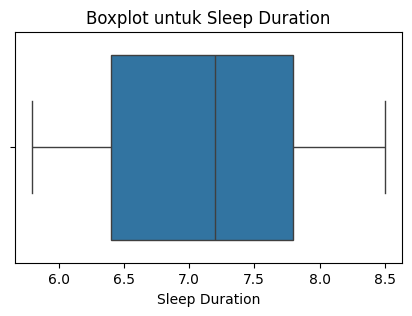

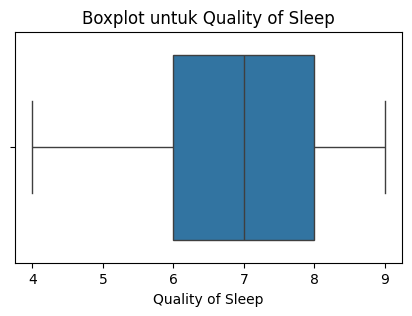

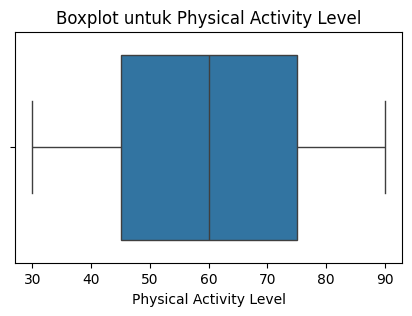

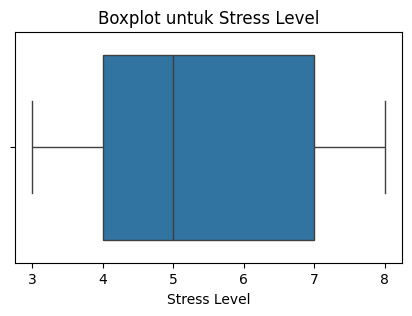

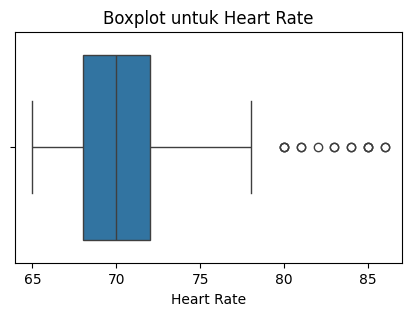

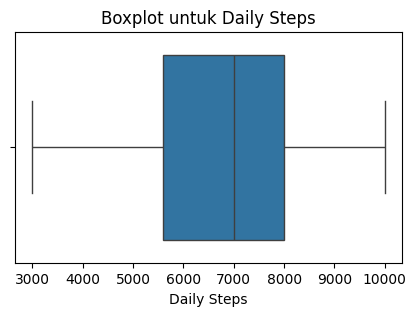

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil kolom numerik
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(5, 3))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot untuk {col}')
    plt.show()

#### Setelah di cek, ternyata ada Outlier pada kolom "Heart Rate".
jadi kita akan menangani Outlier tersebut dengan metode IQR

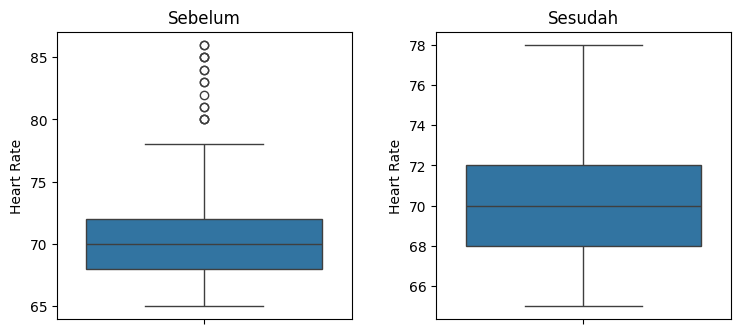

In [75]:
# Sebelum handling outlier
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
plt.tight_layout(pad=3.0)

sns.boxplot(y=df['Heart Rate'], ax=axes[0])
axes[0].set_title("Sebelum")

# Menangani outlier dengan metode IQR
Q1 = df['Heart Rate'].quantile(0.25)
Q3 = df['Heart Rate'].quantile(0.75)
IQR = Q3 - Q1

# Ambil data dalam batas normal (1.5 * IQR)
df_no_outlier = df[(df['Heart Rate'] >= (Q1 - 1.5 * IQR)) & (df['Heart Rate'] <= (Q3 + 1.5 * IQR))]

# Setelah handling outlier
sns.boxplot(y=df_no_outlier['Heart Rate'], ax=axes[1])
axes[1].set_title("Sesudah")

plt.show()

## Standarisasi kolom numerik
Agar semua kolom numerik berada dalam skala yang sebanding.
Kolom "Quality of Sleep" tidak dinormalisasi/standarisasi karena itu target label.

In [76]:
from sklearn.preprocessing import StandardScaler

# Kolom numerik yang akan distandarisasi
num_cols = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

# Buat objek scaler
scaler = StandardScaler()

# Simpan versi normalisasi ke dataframe baru
df[num_cols] = scaler.fit_transform(df[num_cols])

# Cek hasil
df[num_cols].head()

,Age,Sleep Duration,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
0,-1.753096,-1.298887,-0.825418,0.347021,1.654719,-1.619584
1,-1.637643,-1.173036,0.039844,1.475592,1.170474,1.970077
2,-1.637643,-1.173036,0.039844,1.475592,1.170474,1.970077
3,-1.637643,-1.550588,-1.402260,1.475592,3.591698,-2.362273
4,-1.637643,-1.550588,-1.402260,1.475592,3.591698,-2.362273


 Data diubah agar memiliki mean = 0 dan std = 1 sehingga setiap fitur memiliki bobot yang seimbang dalam model.  
 metode ini juga lebih tahan terhadap outlier ringan dibanding normalisasi.

## Encoding Kolom Kategorikal (Ordinal Encoding)

In [77]:
from sklearn.preprocessing import OrdinalEncoder

df_encoded = df.copy()

# Kolom kategorikal
cat_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

# Ganti NaN dengan kategori "Unknown"
df_encoded[cat_cols] = df_encoded[cat_cols].fillna('Unknown')

# Membuat objek OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Melakukan encoding
df_encoded[cat_cols] = ordinal_encoder.fit_transform(df_encoded[cat_cols])

# Melihat hasil
df_encoded[cat_cols].head()

,Gender,Occupation,BMI Category,Sleep Disorder
0,1.0,9.0,3.0,2.0
1,1.0,1.0,0.0,2.0
2,1.0,1.0,0.0,2.0
3,1.0,6.0,2.0,1.0
4,1.0,6.0,2.0,1.0


Kolom kategorikal pada dataset diubah menjadi bentuk numerik menggunakan **Ordinal Encoding**.  
Ini memberikan nilai numerik (0, 1, 2, ..) pada setiap kategori tanpa menambah kolom baru.

Berikut adalah cara melihat hasil pemetaan kategori ke nilai numerik:

In [78]:
# tampilkan kategori dan urutan encoding-nya
for col, categories in zip(cat_cols, ordinal_encoder.categories_):
    print(f"\n{col}:")
    for i, cat in enumerate(categories):
        print(f"  {cat} -> {i}")



Gender:
  Female -> 0
  Male -> 1

Occupation:
  Accountant -> 0
  Doctor -> 1
  Engineer -> 2
  Lawyer -> 3
  Manager -> 4
  Nurse -> 5
  Sales Representative -> 6
  Salesperson -> 7
  Scientist -> 8
  Software Engineer -> 9
  Teacher -> 10

BMI Category:
  Normal -> 0
  Normal Weight -> 1
  Obese -> 2
  Overweight -> 3

Sleep Disorder:
  Insomnia -> 0
  Sleep Apnea -> 1
  Unknown -> 2


## Feature Engineering

Tahap ini untuk membuat fitur baru yang dapat memberikan informasi tambahan bagi model prediksi.
Fitur baru yang dibuat adalah **Sleep_Efficiency**, yang menggambarkan tingkat efisiensi tidur seseorang berdasarkan kombinasi antara durasi tidur, kualitas tidur, dan tingkat stres.
Fitur ini dibuat menggunakan rumus:

**Sleep_Efficiency = (Quality of Sleep / (Stress Level + 1)) * Sleep Duration**

Rumus tersebut dibuat berdasarkan asumsi bahwa:
- Semakin tinggi kualitas tidur, semakin efisien tidur seseorang.
- Semakin tinggi tingkat stres, maka efisiensi tidur cenderung menurun.
- Durasi tidur juga berperan penting dalam menentukan efisiensi keseluruhan.

Berikut adalah implementasinya:

In [79]:
df_encoded['Sleep_Efficiency'] = (
    df_encoded['Quality of Sleep'] / (df_encoded['Stress Level'] + 1)
) * df_encoded['Sleep Duration']

df_encoded[['Sleep Duration', 'Quality of Sleep', 'Stress Level', 'Sleep_Efficiency']].head()


,Sleep Duration,Quality of Sleep,Stress Level,Sleep_Efficiency
0,-1.298887,6,0.347021,-5.785600
1,-1.173036,6,1.475592,-2.843045
2,-1.173036,6,1.475592,-2.843045
3,-1.550588,4,1.475592,-2.505403
4,-1.550588,4,1.475592,-2.505403


Bisa dilihat nilai **Sleep_Efficiency** bernilai negatif, tapi tenang itu terjadi karena data numerik sebelumnya telah distandarisasi menggunakan *StandardScaler*.  
Dengan demikian, nilai negatif bukan berarti “buruk”, melainkan menunjukkan posisi relatif terhadap rata-rata (mean = 0).  
Fitur ini nantinya dapat membantu model mengenali hubungan antara kualitas tidur, stres, dan durasi tidur dalam menentukan tingkat kualitas tidur seseorang secara keseluruhan.

## Splitting Data ke dalam Data Training & Data Testing

In [80]:
from sklearn.model_selection import train_test_split

# Menentukan fitur (X) dan target (y)
X = df_encoded.drop(columns=['Quality of Sleep'])  # semua kolom kecuali target
y = df_encoded['Quality of Sleep']                 # kolom target

# Membagi dataset menjadi data training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Menampilkan ukuran data hasil pembagian
print("Jumlah data training :", X_train.shape[0])
print("Jumlah data testing  :", X_test.shape[0])


Jumlah data training : 299
Jumlah data testing  : 75


Pada tahap ini, dataset dibagi menjadi dua bagian, yaitu:

- **Data training (80%)** → digunakan untuk melatih model machine learning.  
- **Data testing (20%)** → digunakan untuk menguji performa model terhadap data baru yang belum pernah dilihat.